# Ensemble : Bagging

## 1.환경준비

### (1) import

In [1]:
#라이브러리들을 불러오자.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 전처리
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 모델링
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

/Users/cyeongy/opt/anaconda3/envs/kt-aivle/lib/python3.8/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### (2) 데이터 준비

* 변수설명
    * COLLEGE : 대학 졸업여부
    * INCOME : 연수입
    * OVERAGE : 월평균 초과사용 시간(분)
    * LEFTOVER : 월평균 잔여시간비율(%)
    * HOUSE : 집값
    * HANDSET_PRICE : 스마트폰 가격
    * OVER_15MINS_CALLS_PER_MONTH : 월평균 장기통화(15분이상) 횟수
    * AVERAGE_CALL_DURATION : 평균 통화 시간
    * REPORTED_SATISFACTION : 만족도 설문조사 결과
    * REPORTED_USAGE_LEVEL : 사용도 자가진단 결과
    * CONSIDERING_CHANGE_OF_PLAN : 향후 변경계획 설문조사 결과
    * CHURN : 이탈(번호이동) 여부 (1-이탈, 0-잔류, Target 변수)


In [2]:
# 데이터를 불러옵시다.
path = 'https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_cust_churn.csv'
data = pd.read_csv(path)
data = data.sample(5000, random_state = 2022)
data['CHURN'] = data['CHURN'].map({'LEAVE':1, 'STAY':0})
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
3178,3179,0,119512,51,31,248566,229,5,2,very_sat,very_high,considering,1
14926,14927,1,142144,192,15,774317,581,29,4,unsat,very_little,never_thought,1
15116,15117,1,142308,0,79,306426,497,1,1,sat,little,considering,0
12733,12734,1,113385,0,0,333599,819,1,6,very_unsat,very_high,considering,1
14032,14033,1,90348,209,10,637286,360,26,4,unsat,little,actively_looking_into_it,0


## 2.데이터 준비

### (1) 데이터 정리

In [3]:
drop_cols = ['id']
data.drop(drop_cols, axis = 1, inplace = True )

### (2) 데이터분할1 : x, y 나누기

In [4]:
target = 'CHURN'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### (3) NA 조치

### (4) 가변수화

In [5]:
dumm_cols = ['REPORTED_SATISFACTION','REPORTED_USAGE_LEVEL','CONSIDERING_CHANGE_OF_PLAN']
x = pd.get_dummies(x, columns = dumm_cols, drop_first = True)

### (5) 데이터분할2 : train : validation

In [6]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.3, random_state = 2022)

## 3.모델링 : 랜덤포레스트


In [7]:
# 모델 선언
model = RandomForestClassifier(n_estimators = 5, max_depth = 3)

In [8]:
# 학습
model.fit(x_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=5)

In [9]:
# 예측
pred = model.predict(x_val)

In [10]:
# 평가
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.68      0.77      0.72       769
           1       0.72      0.61      0.66       731

    accuracy                           0.69      1500
   macro avg       0.70      0.69      0.69      1500
weighted avg       0.70      0.69      0.69      1500



## 4.시각화와 변수중요도

### (1) 모델의 내부를 살펴봅시다.

In [17]:
# 5개 decision tree
model.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1336445135),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1467095659),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=197276395),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=106447338),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=973376431)]

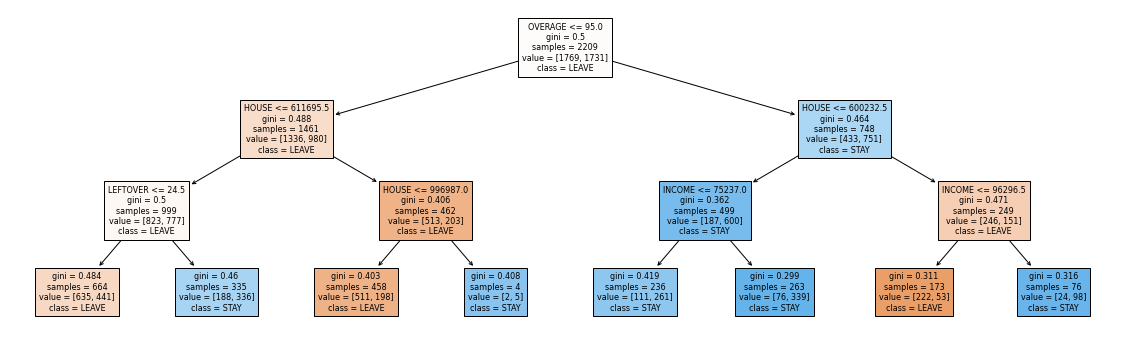

In [12]:
# 각 트리별로 시각화 할 수 있다.
plt.figure(figsize=(20,6))
plot_tree(model.estimators_[0], 
               feature_names = x_train.columns,
               class_names= ['LEAVE','STAY'], 
               filled = True, fontsize = 8);

### (2) 변수 중요도

In [13]:
# 변수 중요도
print(x_train.columns)
print(model.feature_importances_)

Index(['COLLEGE', 'INCOME', 'OVERAGE', 'LEFTOVER', 'HOUSE', 'HANDSET_PRICE',
       'OVER_15MINS_CALLS_PER_MONTH', 'AVERAGE_CALL_DURATION',
       'REPORTED_SATISFACTION_sat', 'REPORTED_SATISFACTION_unsat',
       'REPORTED_SATISFACTION_very_sat', 'REPORTED_SATISFACTION_very_unsat',
       'REPORTED_USAGE_LEVEL_high', 'REPORTED_USAGE_LEVEL_little',
       'REPORTED_USAGE_LEVEL_very_high', 'REPORTED_USAGE_LEVEL_very_little',
       'CONSIDERING_CHANGE_OF_PLAN_considering',
       'CONSIDERING_CHANGE_OF_PLAN_never_thought',
       'CONSIDERING_CHANGE_OF_PLAN_no', 'CONSIDERING_CHANGE_OF_PLAN_perhaps'],
      dtype='object')
[0.00475188 0.08597095 0.34590198 0.0350613  0.43557729 0.01291203
 0.00942005 0.04356005 0.         0.         0.00890886 0.
 0.00285455 0.00425624 0.         0.         0.00578852 0.
 0.         0.0050363 ]


* 변수중요도 그래프 그리기 함수 만들기

In [14]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

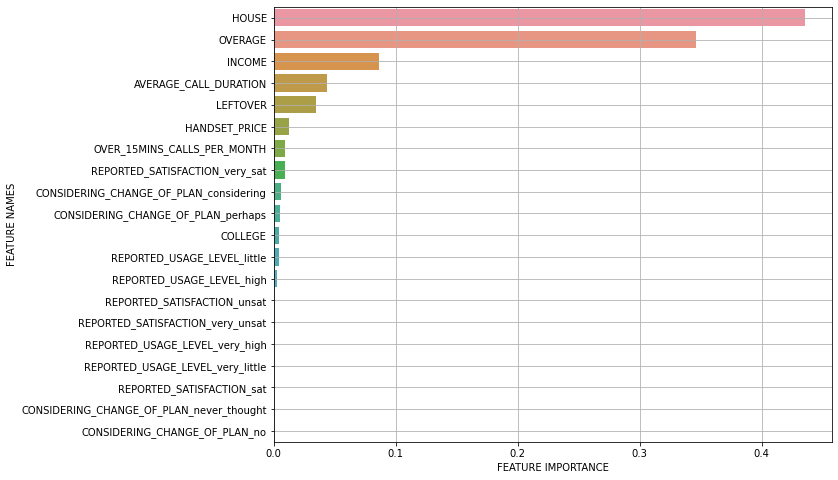

In [15]:
result = plot_feature_importance(model.feature_importances_, x_train.columns)

## 5.실습: random forest 튜닝

* grid search를 수행합니다.
    * ① n_estimators 의 갯수를 5 ~ 200까지 5개씩 증가시켜가며 튜닝해 봅시다.
    * ② max_features를 1 ~ feature갯수까지 1씩 증가시켜가며 튜닝해 봅시다.
    * ③ n_estimators, max_features를 동시에 튜닝.

* 모델링 후 cv 평가 결과를 차트로 그려봅시다. 
* 튜닝된 모델로 부터 변수중요도를 뽑아 봅시다.


### (1) n_estimators 튜닝

In [18]:
models = GridSearchCV(RandomForestClassifier(), param_grid={'n_estimators': range(5, 201, 5)}, cv=10)

In [19]:
models.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': range(5, 201, 5)})

In [20]:
pred = models.predict(x_val)

In [23]:
models.best_score_

0.6937142857142857

In [24]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.72      0.71      0.71       769
           1       0.70      0.71      0.71       731

    accuracy                           0.71      1500
   macro avg       0.71      0.71      0.71      1500
weighted avg       0.71      0.71      0.71      1500



- 튜닝 결과를 그래프로 그리기

In [28]:
# 튜닝 결과를 데이터 프레임으로 저장
result = pd.DataFrame(models.cv_results_)
result.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.019347,0.004873,0.001622,0.000560,5,{'n_estimators': 5},0.651429,0.662857,0.631429,0.677143,0.640000,0.600000,0.634286,0.660000,0.688571,0.634286,0.648000,0.024271,40
1,0.031584,0.008929,0.001692,0.000452,10,{'n_estimators': 10},0.680000,0.631429,0.685714,0.648571,0.694286,0.611429,0.645714,0.671429,0.682857,0.674286,0.662571,0.025569,39
2,0.037218,0.000769,0.001681,0.000105,15,{'n_estimators': 15},0.645714,0.622857,0.682857,0.722857,0.671429,0.614286,0.662857,0.662857,0.702857,0.677143,0.666571,0.031611,38
3,0.049555,0.000605,0.001911,0.000103,20,{'n_estimators': 20},0.660000,0.642857,0.697143,0.685714,0.694286,0.628571,0.645714,0.688571,0.717143,0.671429,0.673143,0.026808,36
4,0.065662,0.003990,0.002543,0.000363,25,{'n_estimators': 25},0.665714,0.622857,0.720000,0.694286,0.642857,0.651429,0.657143,0.714286,0.700000,0.645714,0.671429,0.031636,37


In [29]:
temp = result.loc[:, ['param_n_estimators','mean_test_score']]
temp.head()

,param_n_estimators,mean_test_score
0,5,0.648000
1,10,0.662571
2,15,0.666571
3,20,0.673143
4,25,0.671429


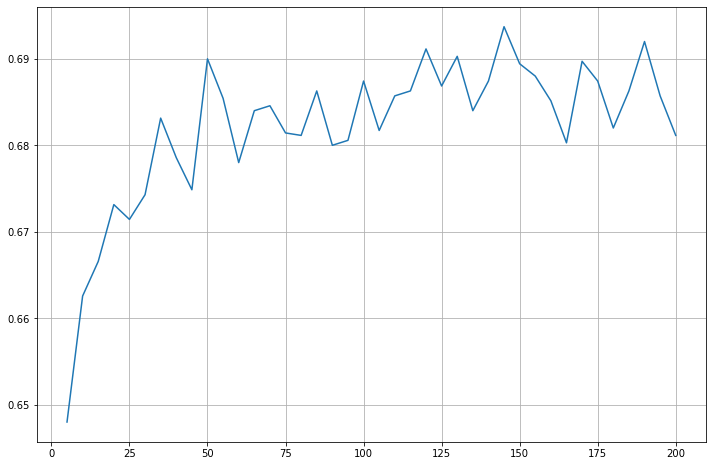

In [30]:
plt.figure(figsize=(12, 8))
plt.plot('param_n_estimators', 'mean_test_score', data=temp)
plt.grid()
plt.show()

### (2) max_features 튜닝

* 변수 중요도

### (3) n_estimators와 max_features를 한꺼번에 튜닝